In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
#from sklea

In [2]:
np.random.seed(1729)

In [3]:
df = pd.read_csv("D:/MLP_Project/train.csv")

In [7]:
# Checking Null Values
df.isnull().sum()

id       0
v_21     0
v_32     0
v_15     0
v_4      0
v_1      0
v_8      0
v_12     0
v_25     0
v_20     0
v_18     0
v_3      0
v_11     0
v_14     0
v_26     0
v_27     0
v_30     0
v_9      0
v_31     0
v_28     0
v_13     0
v_33     0
v_17     0
v_19     0
v_29     0
v_23     0
v_24     0
v_10     0
v_5      0
v_6      0
v_22     0
v_0      0
v_7      0
v_2      0
v_16     0
v_34     0
v_35     0
v_36     0
v_37     0
v_38     0
v_39     0
v_40     0
label    0
dtype: int64

In [4]:
Features = df[['v_21', 'v_32', 'v_15', 'v_4', 'v_1', 'v_8', 'v_12', 'v_25',
       'v_20', 'v_18', 'v_3', 'v_11', 'v_14', 'v_26', 'v_27', 'v_30', 'v_9',
       'v_31', 'v_28', 'v_13', 'v_33', 'v_17', 'v_19', 'v_29', 'v_23', 'v_24',
       'v_10', 'v_5', 'v_6', 'v_22', 'v_0', 'v_7', 'v_2', 'v_16', 'v_34',
       'v_35', 'v_36', 'v_37', 'v_38', 'v_39', 'v_40']]

In [5]:
Labels=df['label']

In [6]:
Features.shape, Labels.shape

((3796, 41), (3796,))

In [7]:
Sc = StandardScaler()
Minmax = MinMaxScaler()
Abs = MaxAbsScaler()

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(Features,Labels,test_size=0.15,random_state=42)
X_train_sc,X_test_sc,Y_train,Y_test=train_test_split(Sc.fit_transform(Features),Labels,test_size=0.15,random_state=42)
X_train_minmax,X_test_minmax,Y_train,Y_test=train_test_split(Minmax.fit_transform(Features),Labels,test_size=0.15,random_state=42)
X_train_ABS,X_test_ABS,Y_train,Y_test=train_test_split(Abs.fit_transform(Features),Labels,test_size=0.15,random_state=42)

In [9]:
X_train.shape, X_test.shape

((3226, 41), (570, 41))

In [8]:
# IMPORTING CLASSIFIERS

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier

In [12]:
#XGB = XGBClassifier(n_estimators=100,max_depth=2,subsample=0.8,learning_rate=0.5)
XGB = XGBClassifier(random_state=42)

In [13]:
XGB.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [14]:
XGB.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [15]:
print(classification_report(Y_test,XGB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       178
           1       0.78      0.91      0.84       283
           2       0.52      0.30      0.38       109

    accuracy                           0.74       570
   macro avg       0.69      0.65      0.66       570
weighted avg       0.72      0.74      0.73       570



In [18]:
Ada = AdaBoostClassifier(random_state=1)
Grad = GradientBoostingClassifier(n_estimators=50,random_state=42)

In [19]:
Ada.fit(X_train,Y_train)

AdaBoostClassifier(random_state=1)

In [20]:
print(classification_report(Y_test,Ada.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       178
           1       0.74      0.86      0.80       283
           2       0.46      0.30      0.36       109

    accuracy                           0.70       570
   macro avg       0.64      0.62      0.63       570
weighted avg       0.68      0.70      0.69       570



In [21]:
Grad.fit(X_train,Y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

In [22]:
print(classification_report(Y_test,Grad.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       178
           1       0.74      0.93      0.82       283
           2       0.47      0.23      0.31       109

    accuracy                           0.73       570
   macro avg       0.67      0.63      0.63       570
weighted avg       0.71      0.73      0.70       570



In [16]:
shuffle = ShuffleSplit(n_splits=10,test_size=0.2,random_state=42)

In [17]:
cv1 = cross_validate(XGB,X_train,Y_train,cv=shuffle,scoring='f1_macro')

In [58]:
cv1

{'fit_time': array([0.22191262, 0.2174201 , 0.22938609, 0.21692538, 0.20994425,
        0.21293664, 0.22191262, 0.20894718, 0.21293616, 0.21543646]),
 'score_time': array([0.00598383, 0.00498509, 0.004987  , 0.00598407, 0.00498676,
        0.00598335, 0.004987  , 0.00498676, 0.00598407, 0.00598431]),
 'test_score': array([0.66316641, 0.6646335 , 0.68227664, 0.64332806, 0.64370026,
        0.6650112 , 0.63816501, 0.63986416, 0.65842269, 0.66305129])}

In [80]:
Rcv = GridSearchCV(estimator=XGB,param_grid={'n_estimators':[200,400,700],'learning_rate':[0.001,0.01,0.5,1,2]})

In [81]:
Rcv.fit(X_train,Y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.001, 0.01, 0.5, 1, 2],
                         'n_estimators': [200, 400, 700]})

In [82]:
best = Rcv.best_estimator_

In [83]:
Rcv.best_params_

{'learning_rate': 0.5, 'n_estimators': 400}

In [84]:
best.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [85]:
print(classification_report(Y_test,best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       178
           1       0.79      0.90      0.84       283
           2       0.57      0.37      0.45       109

    accuracy                           0.76       570
   macro avg       0.71      0.68      0.68       570
weighted avg       0.74      0.76      0.74       570



In [61]:
# XG BOOST

In [27]:
from xgboost import XGBClassifier

In [28]:
XG = XGBClassifier()

In [31]:
Rcv1 = GridSearchCV(estimator=XG,param_grid={'n_estimators':[20,25,30,35]},cv=shuffle,scoring='f1_macro')

In [32]:
Rcv1.fit(X_train,Y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'n_estimators': [20, 25, 30, 35]}, scoring='f1_macro')

In [33]:
best1 = Rcv1.best_estimator_

In [34]:
best1.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=35, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [35]:
print(classification_report(Y_test,best1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       178
           1       0.78      0.90      0.84       283
           2       0.49      0.28      0.36       109

    accuracy                           0.74       570
   macro avg       0.67      0.65      0.65       570
weighted avg       0.71      0.74      0.72       570



In [36]:
from sklearn.datasets import load_wine

In [37]:
Features,Labels=load_wine(as_frame=True,return_X_y=True)

In [38]:
Features.shape,Labels.shape

((178, 13), (178,))

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(Features,Labels,test_size=0.30,random_state=1)

In [40]:
Ada.fit(X_train,Y_train)

AdaBoostClassifier(random_state=1)

In [41]:
Ada.score(X_train,Y_train)

0.6774193548387096

In [42]:
Ada.score(X_test,Y_test)

0.5370370370370371

In [43]:
Rcv = GridSearchCV(estimator=Ada,param_grid={'n_estimators':[100,500,1000],'learning_rate':[0.5,1,2]},cv=4)

In [44]:
Rcv.fit(X_train,Y_train)

GridSearchCV(cv=4, estimator=AdaBoostClassifier(random_state=1),
             param_grid={'learning_rate': [0.5, 1, 2],
                         'n_estimators': [100, 500, 1000]})

In [45]:
Rcv.score(X_train,Y_train)

1.0

In [46]:
Rcv.score(X_test,Y_test)

0.9629629629629629

In [47]:
Rcv.best_params_

{'learning_rate': 0.5, 'n_estimators': 100}

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\santo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


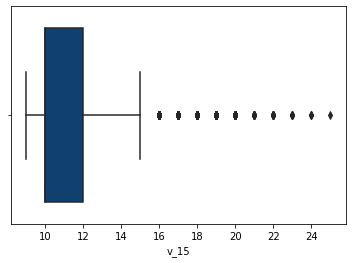

In [54]:
sns.boxplot('v_15',data=df,palette='ocean')
plt.show()

In [55]:
df['v_15'].describe()

count    3796.000000
mean       11.609062
std         2.576362
min         9.000000
25%        10.000000
50%        10.000000
75%        12.000000
max        25.000000
Name: v_15, dtype: float64

In [56]:
numerical= df.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Numerical Features in Train Set: 43


In [58]:
categ= df.select_dtypes(include =[np.object_])
print("Categ Features in Train Set:",categ.shape[1])

Categ Features in Train Set: 0
